## Observations and Insights 

Observations about the data:
1. Looking at the line chart of treated mice with capomulin, as the mouse is treated over a period of time the size of the tumor decreases.
2. Looking at the scatter plot of mouse weight vs tumor size, it looks like as the weight of the mouse increases so does the size of the tumor.
3. Based on the boxplot the mice treated with Ramicane and Capomulin seem to have smaller sized tumors than the rest of the treatment regimens.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [3]:
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data2 = combined_data.loc[combined_data["Mouse ID"] != "g989"]
data2.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
data2["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumorAvg = data2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumorMed = data2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumorVar = data2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumorStd = data2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumorSem = data2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sum1 = pd.concat([tumorAvg, tumorMed, tumorVar, tumorStd, tumorSem])
sum1.columns = ["Mean", "Median", "Var", "Std", "Sem"]
sum1
    



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Capomulin     4.994774
Ceftamin      6.268188
Infubinol     6.567243
Ketapril      8.279709
Naftisol      8.134708
Placebo       7.821003
Propriva      6.622085
Ramicane      4.846308
Stelasyn      7.710419
Zoniferol     6.966589
Capomulin     0.329346
Ceftamin      0.469821
Infubinol     0.49223

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum2 = data2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
sum2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

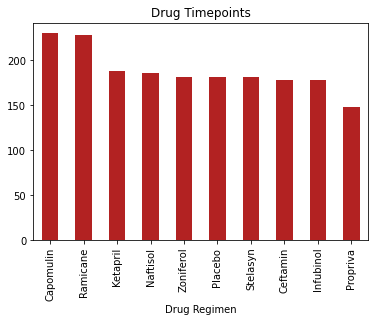

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Timepoints", color="firebrick")
plt.show()


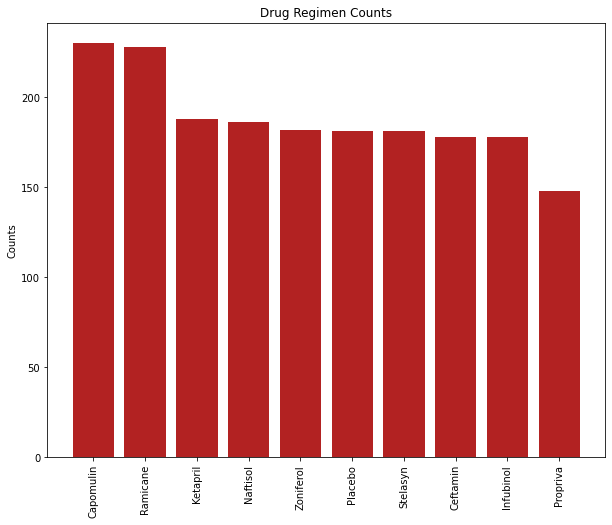

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data3 = data2.groupby("Drug Regimen").size().sort_values(ascending=False).reset_index()
data3.columns = ["Drug Regimen", "Observations"]

plt.figure(figsize=(10,8))

plt.bar(data3["Drug Regimen"], data3.Observations, color="firebrick")
plt.title("Drug Regimen Counts")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

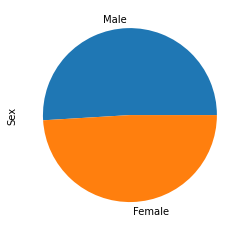

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data2.Sex.value_counts().plot(kind="pie")
plt.show()


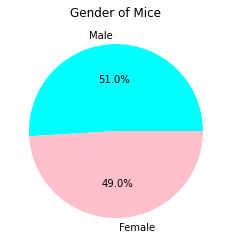

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = data2["Sex"].value_counts().reset_index()
pie2.columns = ["Gender", "Count"]
pie_slices = pie2["Count"]
colors = ["cyan", "pink"]
pieces = pie2.Gender

plt.pie(pie_slices, labels=pieces, colors=colors, autopct="%1.1f%%")
plt.title("Gender of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time1 = data2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data3 = pd.merge(data2, time1, on=["Mouse ID", "Timepoint"], how="inner")
data3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


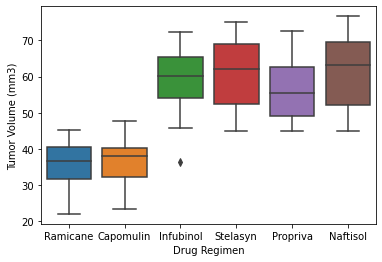

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Ramicane", "Capomulin", "Stelasyn", "Propriva", "Infubinol", "Naftisol"]

data4 = data3.loc[data3["Drug Regimen"].isin(drug_regimen)].reset_index(drop=True)

sns.boxplot(data=data4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()
    

## Line and Scatter Plots

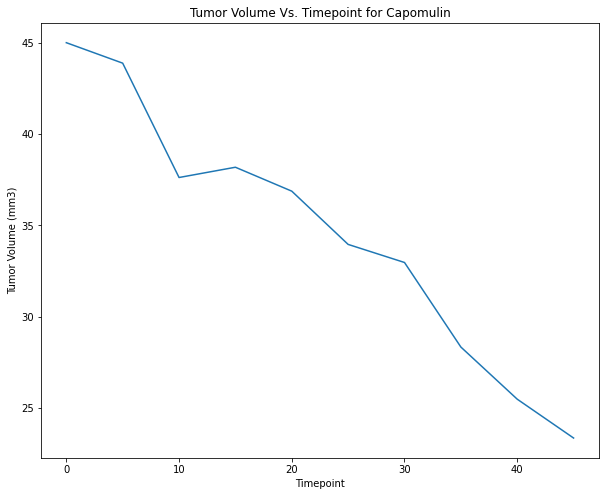

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data2.loc[data2["Drug Regimen"] == "Capomulin"]
mouse1 = data2.loc[data2["Mouse ID"] == "s185"]

plt.figure(figsize=(10,8))
plt.title("Tumor Volume Vs. Timepoint for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse1.Timepoint, mouse1["Tumor Volume (mm3)"])
plt.show()

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data5 = data2.loc[data2["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data5.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344


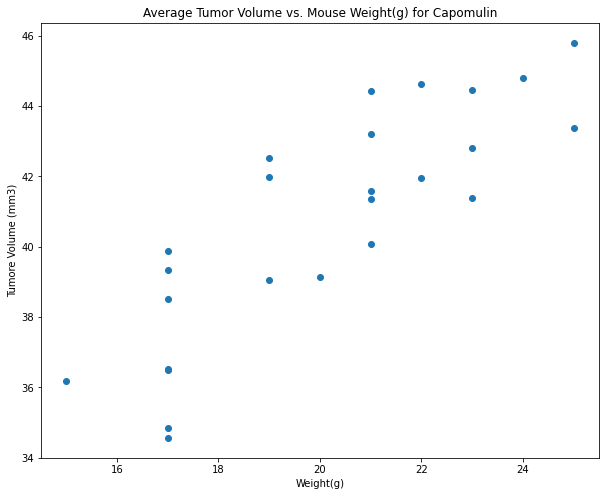

In [22]:
# making the scatter plot with data above
plt.figure(figsize=(10,8))
plt.scatter(data5["Weight (g)"], data5["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Tumore Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight(g) for Capomulin")
plt.show()

# Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
data5.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [ ]:
corr1 = data5.corr()

The r-squared is: 0.7088568047708723


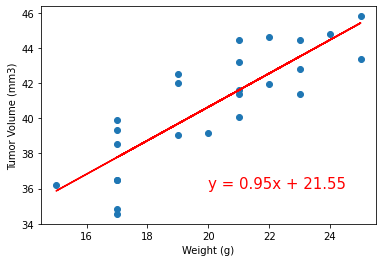

In [26]:
x_values = data5['Weight (g)']
y_values = data5['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()